# Decision Tree

1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

5. Run through steps 2-4 using a different max_depth value.

6. Which model performs better on your in-sample data?

7. Which model performs best on your out-of-sample data, the validate set?

### Planning

Data set: titanic
y(Target): survived

x (features): c;ass, embark town, fare cost, dependent

In [6]:
# tab data
import pandas as pd
import numpy as np

# data viz
import matplotlib.pyplot as plt
import seaborn as sns

# modeling
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree

# data cleaning and importing
from pydataset import data
from prepare import prep_titanic, split_data
from env import get_db_url
from acquire import get_titanic_data

### Acquire
- import from acquire file

In [7]:
# importinng DS
df = get_titanic_data()

### Prepare 
- clean and split the data

In [10]:
# CCleaning the data set
# df = prep_titanic(df)

In [12]:
# splitting the data
train, validate, test = split_data(df, target='survived')

### Exploration
- skip for now becasue not complete
- create a a baseline

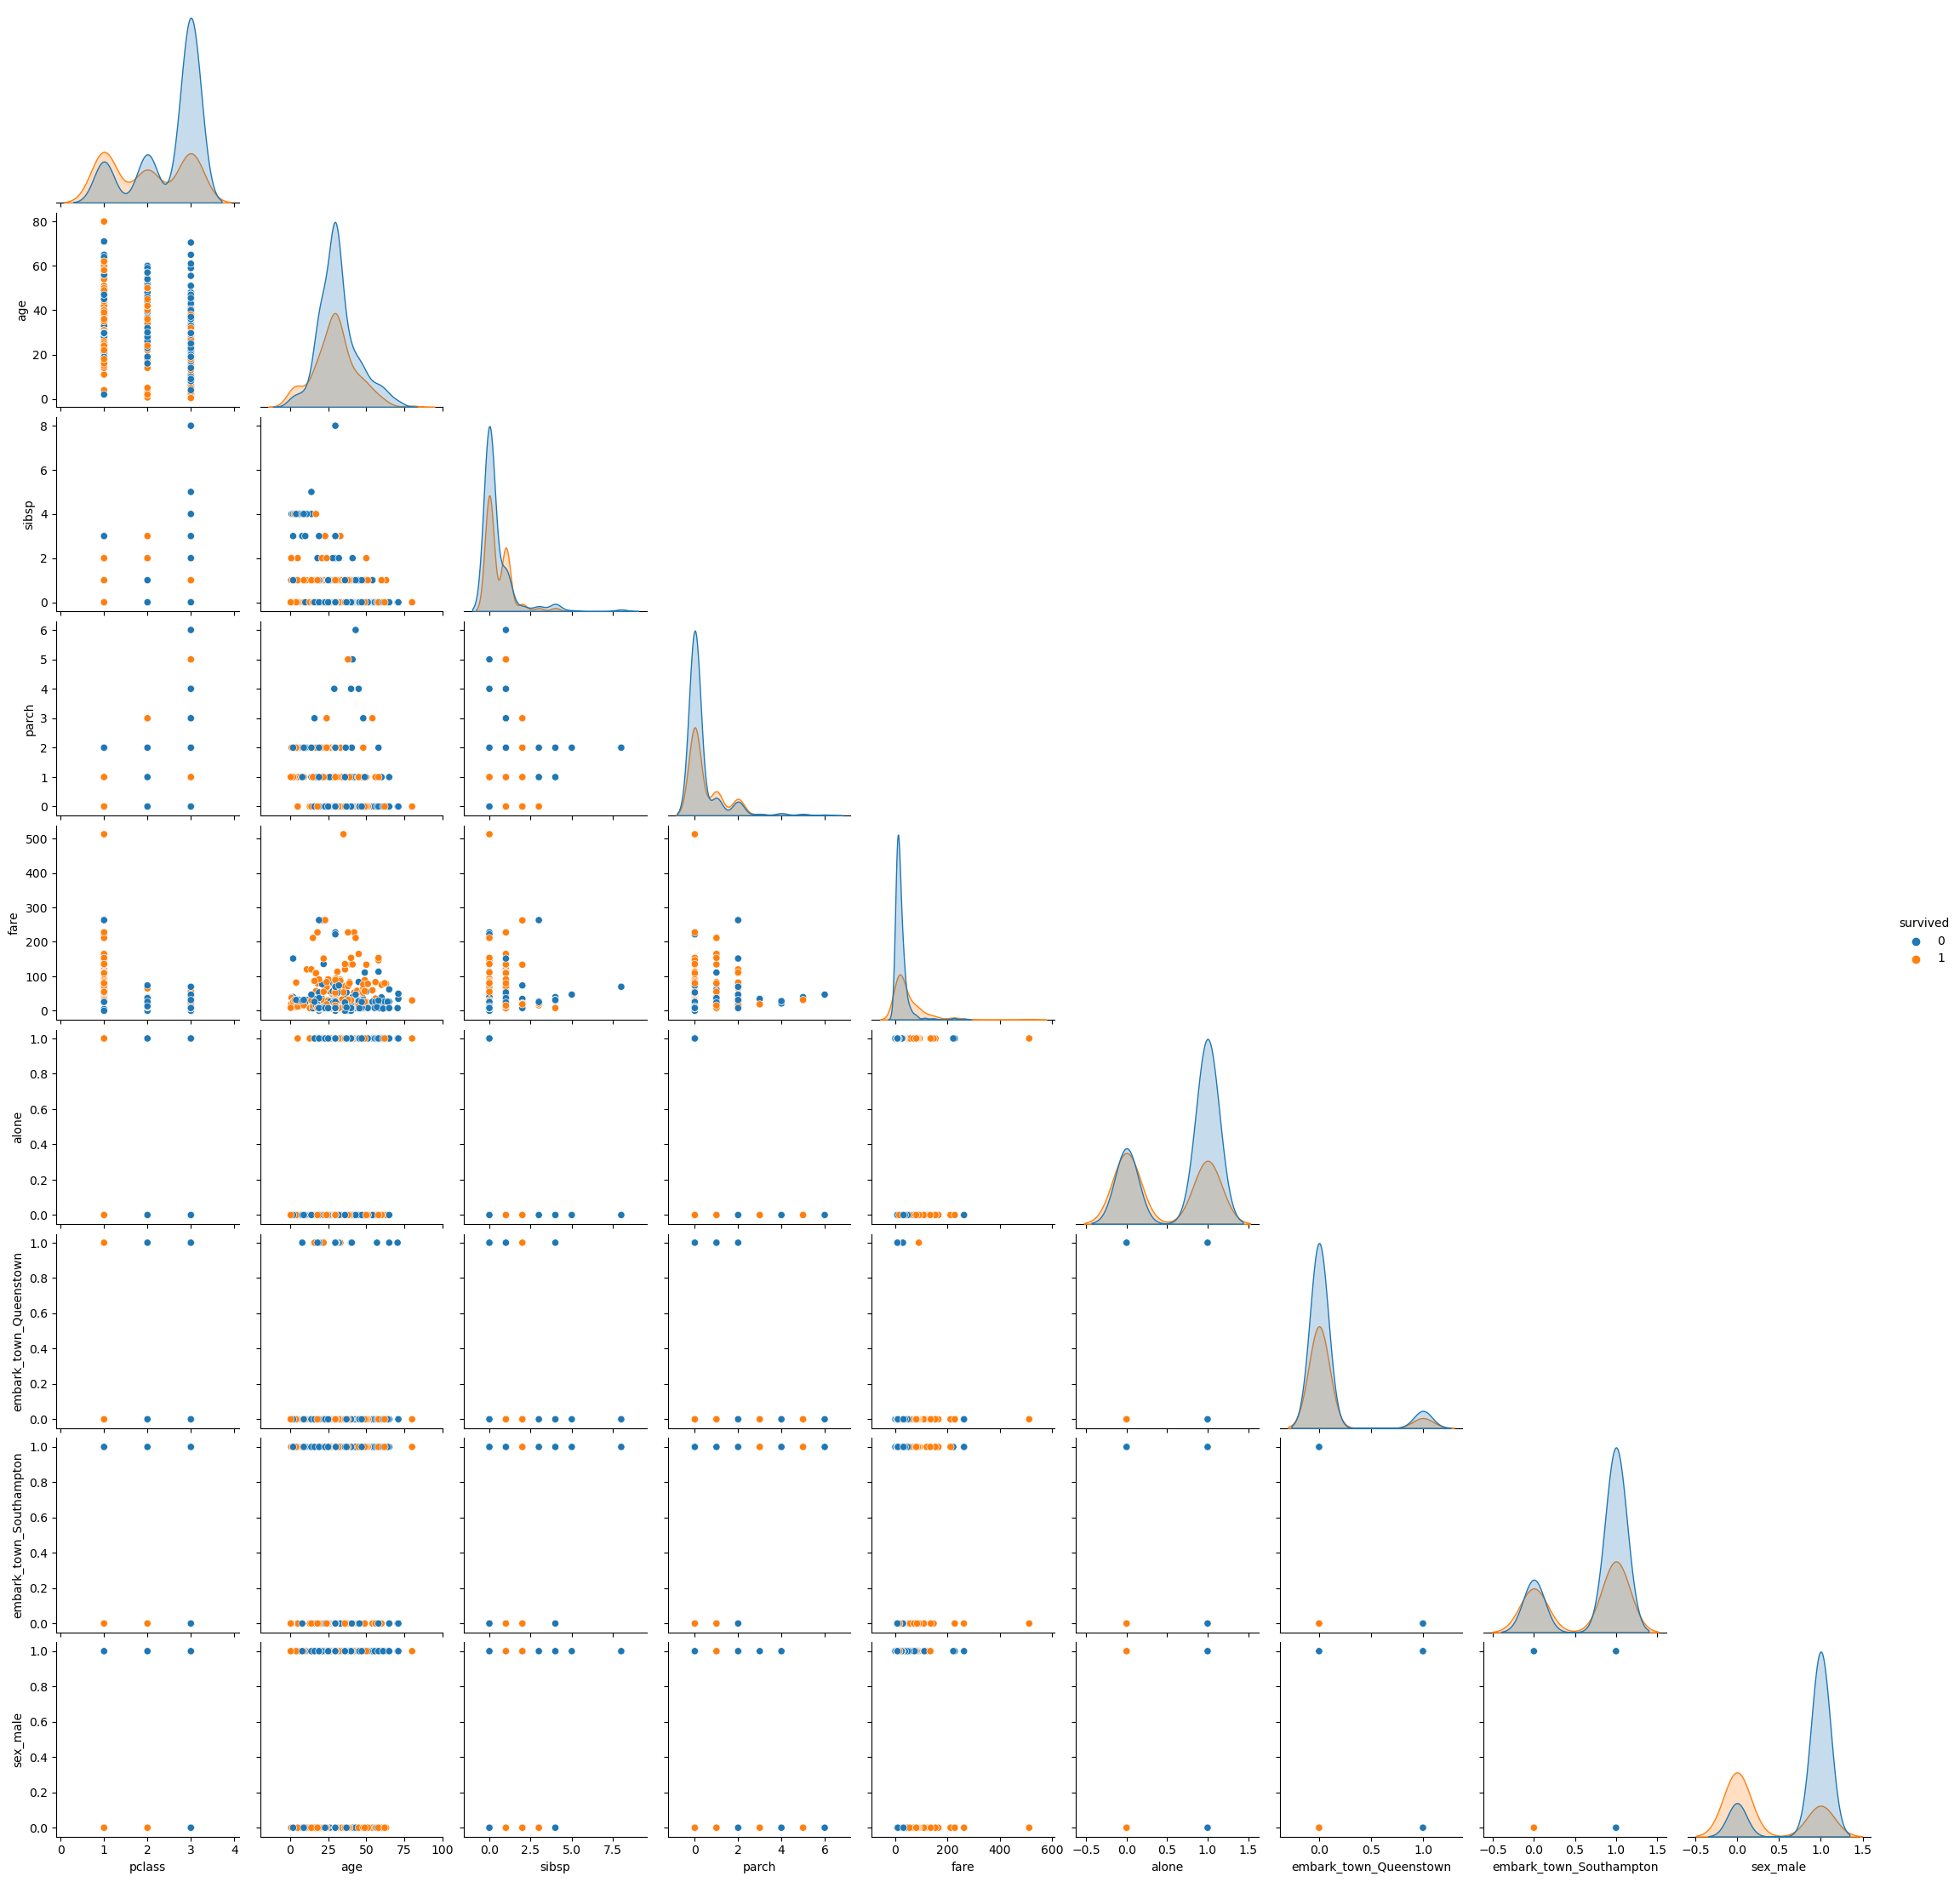

In [14]:
sns.pairplot(train, hue = 'survived', corner=True)
plt.show()

>Takeaways/features of interest:
>- pclass, fare, sex, alone

1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.


In [39]:
# the baseline is the most common occuring outcome in this casre the basline
# id 0 or did not survuve
y_train.value_counts()

0    307
1    191
Name: survived, dtype: int64

In [42]:
# Crerating a new columns with the baseline predicions 
train['baseline'] = 0

### Model
- Assigns features of interest to X_train
- assign series with the targte to y_train

- #### make
    - 
- fit
- use

In [35]:
# assinging target
y_col = 'survived'

# assigning features
x_col = train.columns.to_list()
x_col.remove(y_col)
x_col

['pclass',
 'sex',
 'age',
 'sibsp',
 'parch',
 'fare',
 'embarked',
 'embark_town',
 'alone',
 'embark_town_Queenstown',
 'embark_town_Southampton',
 'sex_male']

In [36]:
# assigning the target's values
y_train = train[y_col]

In [37]:
# assinging features to X_train
X_train = train[x_col]
X_train.head()

,pclass,sex,age,sibsp,parch,fare,embarked,embark_town,alone,embark_town_Queenstown,embark_town_Southampton,sex_male
848,2,male,28.000000,0,1,33.00,S,Southampton,0,0,1,1
808,2,male,39.000000,0,0,13.00,S,Southampton,1,0,1,1
888,3,female,29.699118,1,2,23.45,S,Southampton,0,0,1,0
302,3,male,19.000000,0,0,0.00,S,Southampton,1,0,1,1
501,3,female,21.000000,0,0,7.75,Q,Queenstown,1,1,0,0


### Evaluate
- find the baseline and predict